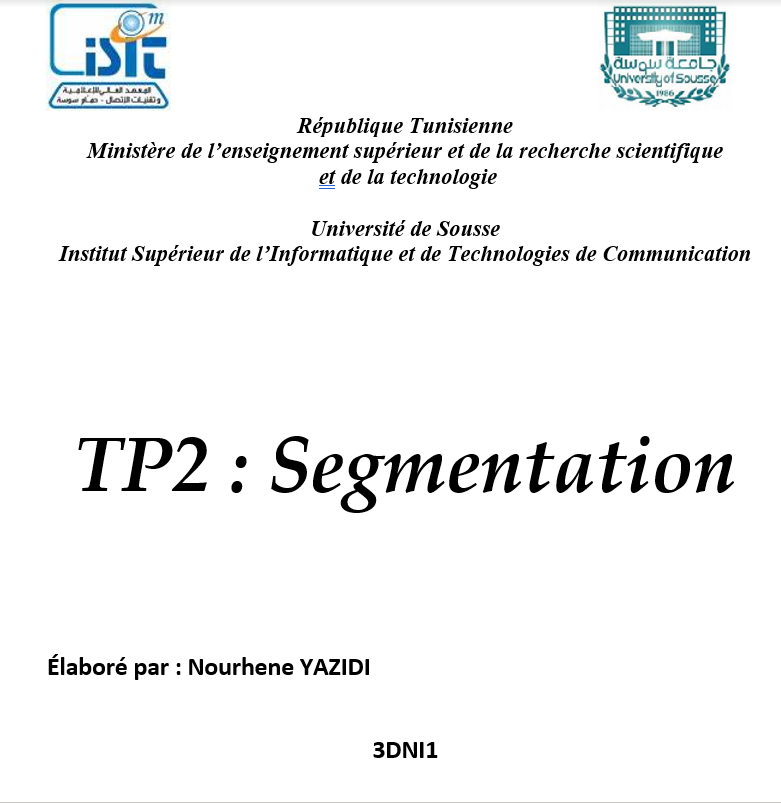

# Segmentation des images:

La segmentation d'image est une opération de traitement d'images qui a pour but de rassembler des pixels entre eux suivant des critères prédéfinis. Les pixels sont ainsi regroupés en régions, qui constituent un pavage ou une partition de l'image. Il peut s'agir par exemple de séparer les objets du fond. Si le nombre de classes est égal à deux, elle est appelée aussi binarisation.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
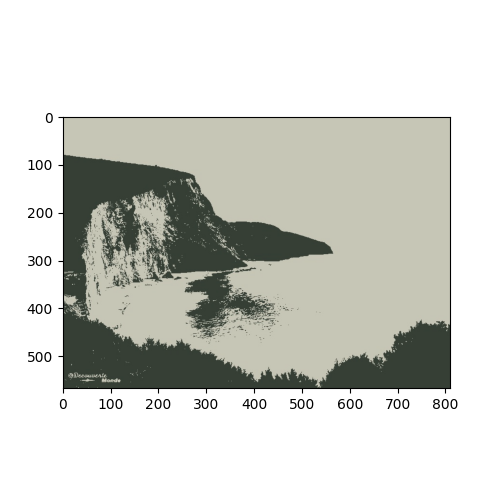

In [20]:
%matplotlib widget
import skimage.io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage
from scipy.cluster.vq import kmeans, vq
import seaborn as sns

# Loading image
image = cv2.imread('img.jpg')
(h1, w1) = image.shape[:2]

# Change color to RGB (from BGR) 
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#reshape the image to a 2D array of pixels and 3 color values (RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('img2.jpg', quant)
image0 = cv2.imread('img2.jpg')

plt.figure(num = 1, figsize = (5,5))
plt.imshow(image0)

cv2.imread('img.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

# Application de bruit sur une image et filtrage:

In [19]:
img_path = "img.jpg"
img = cv2.imread(img_path)

@interact(mode=widgets.Dropdown(options={"Gaussian": "gaussian",
                                  "Localvar": "localvar",
                                  "Poisson": "poisson",
                                   "Salt": "salt",
                                   "Pepper": "pepper",
                                   "s&p": "s&p",
                                   "Speckle": "speckle"
                                  },
                          description='Choisir un noise',
    value='gaussian',
    disabled=False))

def plotnoise(mode='gaussian'):
    plt.clf()
    if mode is not None:
        
        gimg = skimage.util.random_noise(img, mode=mode)
        
        normal = cv2.normalize(gimg, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        filtred = cv2.medianBlur(normal, 3)
        
        plt.figure(num = 2)
        
        plt.subplot(121)
        plt.imshow(gimg)
        plt.title(mode)
        plt.axis("off")
        
        plt.subplot(122)
        plt.imshow(filtred)
        plt.title("filtred")
        plt.axis("off")
    else:
        plt.figure(num = 2, figsize = (5,5))
        plt.imshow(img)
    
    plt.show()

interactive(children=(Dropdown(description='Choisir un noise', options={'Gaussian': 'gaussian', 'Localvar': 'l…

# Algorithme K-means:

K-means est un algorithme non supervisé de clustering non hiérarchique. Il permet de regrouper en K clusters distincts les observations du data set. Ainsi les données similaires se retrouveront  dans un même cluster. Par ailleurs, une observation ne peut se retrouver que dans un cluster à la fois (exclusivité d’appartenance). Une même observation, ne pourra donc, appartenir à deux clusters différents.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
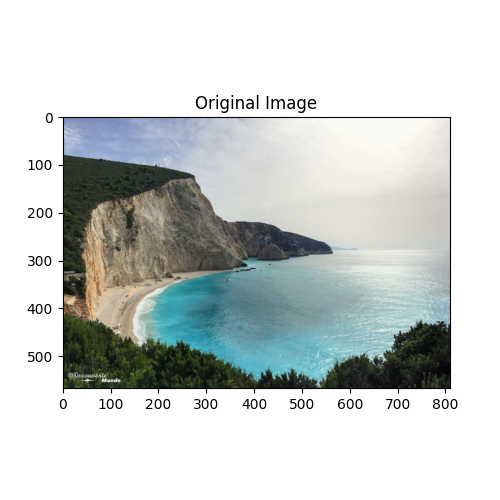

In [6]:
# Loading image
image2 = cv2.imread('img.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


plt.figure(num = 3, figsize = (5,5))
plt.title("Original Image")
plt.imshow(image2)

In [7]:
r = []
g = []
b = []
 
for row in image2:
    for pixel in row:
        # A pixel contains RGB values
        r.append(pixel[0])
        g.append(pixel[1])
        b.append(pixel[2])
 
df = pd.DataFrame({'red':r, 'green':g, 'blue':b})

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
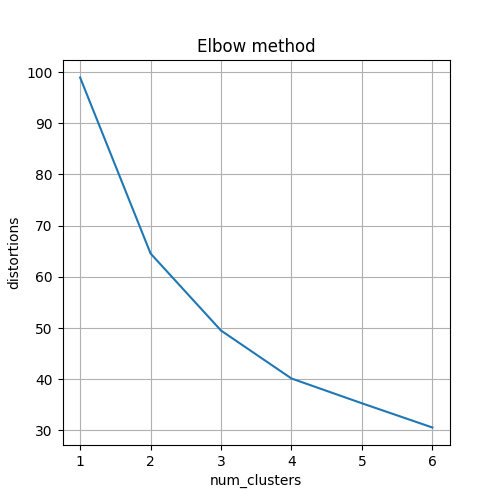

In [8]:
distortions = []
num_clusters = range(1, 7)
 
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['red','green','blue']].values.astype(float), i)
    distortions.append(distortion)
 
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
 
# Creat a line plot of num_clusters and distortions
plt.figure(num = 4, figsize=(5,5))
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)

plt.xticks(num_clusters)
plt.title('Elbow method')
plt.grid()
plt.show()

In [9]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image2.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

In [10]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image2.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [11]:
def CulsterImg(k):
    # number of clusters (K)
    #k = 5
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image2.shape)
    return segmented_image

In [12]:
def plotSegmentedImage(k):
    K_N = CulsterImg(k)
    # show the image
    plt.figure(num = 5, figsize=(5,5))

    #plt.subplot(2,2,1)
    #plt.title('Original Image')
    plt.imshow(image2)

    #plt.subplot(2,2,2)
    plt.title('Image Clustered with k = {}'.format(k))
    plt.imshow(K_N)

    plt.show()

In [22]:
int_slider = widgets.IntSlider(value=2, min=1, max=10, step=1, description='Choisir K')
interact(plotSegmentedImage, k=int_slider)

interactive(children=(IntSlider(value=2, description='Choisir K', max=10, min=1), Output()), _dom_classes=('wi…

<function __main__.plotSegmentedImage(k)>